In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Node Iterator & Compact Forward

In [201]:
result = pd.read_csv('output/node_iterator_compact_forward_results.csv', delimiter=',')

In [202]:
result.loc[result['algorithm'] == 'Compact Forward']

,algorithm,execution_time,dataset,triangle_operations,triangles
10,Compact Forward,5.215605,CA-HepPh.csv,4336273,3358499
11,Compact Forward,4.134704,CA_AstroPh.csv,3823456,1351441
12,Compact Forward,324.055377,com-youtube.csv,41261274,3056386
13,Compact Forward,0.761703,deezer_europe_edges.csv,345276,45034
14,Compact Forward,26.967187,Email-EuAll.csv,2559843,267313
15,Compact Forward,32.297665,git_edges.csv,5121859,523810
16,Compact Forward,2473.347225,large_twitch_edges.csv,653011214,54148892
17,Compact Forward,5.869384,lastfm_asia_edges.csv,134407,40433
18,Compact Forward,2.875606,musae_facebook_edges.csv,2408172,794953
19,Compact Forward,17.619545,soc_Epinions.csv,12285935,1228571


In [203]:
result.loc[result['algorithm'] == 'Node Iterator']

,algorithm,execution_time,dataset,triangle_operations,triangles
0,Node Iterator,14.605739,CA-HepPh.csv,30795430,3358499
1,Node Iterator,7.669528,CA_AstroPh.csv,25901092,1351441
2,Node Iterator,442.757155,com-youtube.csv,2954940368,3056386
3,Node Iterator,0.963178,deezer_europe_edges.csv,3002410,45034
4,Node Iterator,52.745905,Email-EuAll.csv,391879617,267313
5,Node Iterator,39.320542,git_edges.csv,254912550,523810
6,Node Iterator,2875.083477,large_twitch_edges.csv,17691869508,54148895
7,Node Iterator,6.037441,lastfm_asia_edges.csv,1413772,40433
8,Node Iterator,5.271445,musae_facebook_edges.csv,20877277,794953
9,Node Iterator,26.506250,soc_Epinions.csv,149213720,1624481


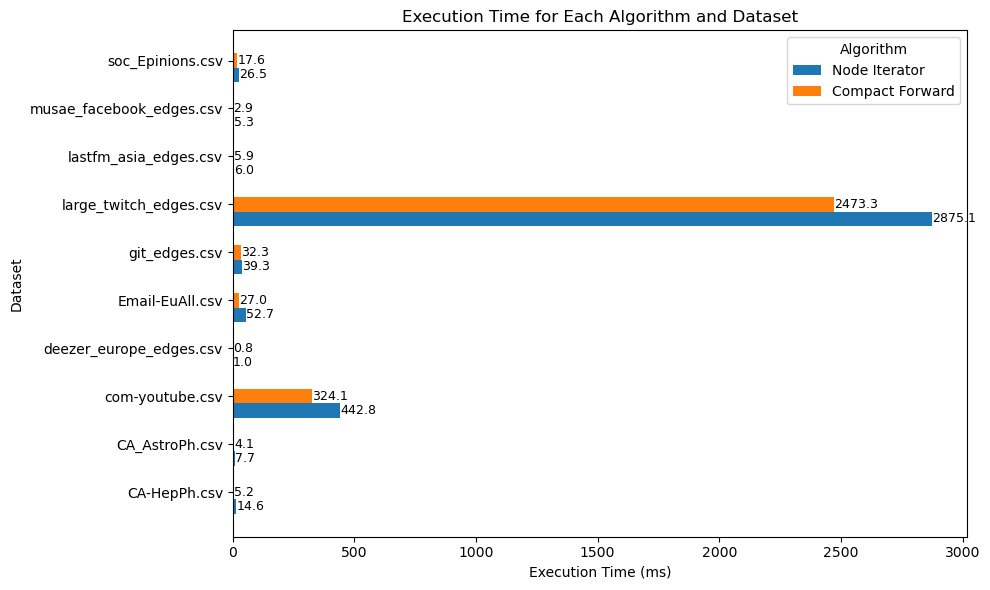

In [204]:
# Get unique algorithms and datasets
algorithms = result['algorithm'].unique()
datasets = result['dataset'].unique()

bar_height = 0.3
y = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot each algorithm's execution time for each dataset
for i, alg in enumerate(algorithms):
    execution_times = [
        result[(result['algorithm'] == alg) & (result['dataset'] == dataset)]['execution_time'].values[0]
        for dataset in datasets
    ]
    bars = plt.barh(y + i * bar_height, execution_times, height=bar_height, label=alg)
    
    # Add text annotations for each bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f'{bar.get_width():.1f}',  # Format the value
            va='center',
            fontsize=9
        )

# Customize the chart
plt.ylabel('Dataset')
plt.xlabel('Execution Time (ms)')
plt.title('Execution Time for Each Algorithm and Dataset')
plt.yticks(y + bar_height, datasets)
plt.legend(title="Algorithm", loc="upper right")

plt.tight_layout()
plt.show()

Show the plot for triangle operations per dataset and algorithm

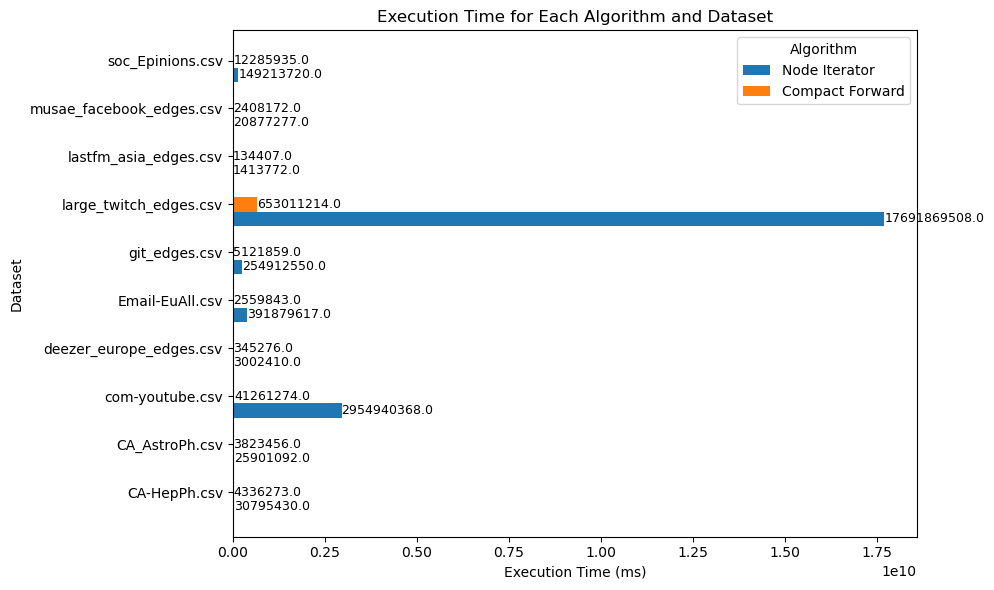

In [205]:
# Get unique algorithms and datasets
algorithms = result['algorithm'].unique()
datasets = result['dataset'].unique()

bar_height = 0.3
y = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot each algorithm's execution time for each dataset
for i, alg in enumerate(algorithms):
    execution_times = [
        result[(result['algorithm'] == alg) & (result['dataset'] == dataset)]['triangle_operations'].values[0]
        for dataset in datasets
    ]
    bars = plt.barh(y + i * bar_height, execution_times, height=bar_height, label=alg)
    
    # Add text annotations for each bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f'{bar.get_width():.1f}',  # Format the value
            va='center',
            fontsize=9
        )

# Customize the chart
plt.ylabel('Dataset')
plt.xlabel('Execution Time (ms)')
plt.title('Execution Time for Each Algorithm and Dataset')
plt.yticks(y + bar_height, datasets)
plt.legend(title="Algorithm", loc="upper right")

plt.tight_layout()
plt.show()

Find average execution time and triangle operations

In [206]:
average_execution_time = result.groupby('algorithm')['execution_time'].mean().reset_index()
print(average_execution_time)
 
print('\n')

average_triangle_operations = result.groupby('algorithm')['triangle_operations'].mean().reset_index()
print(average_triangle_operations)

         algorithm  execution_time
0  Compact Forward      289.314400
1    Node Iterator      347.096066


         algorithm  triangle_operations
0  Compact Forward         7.252877e+07
1    Node Iterator         2.152481e+09


## Doulion

In [207]:

doulion_results = pd.read_csv('output/doulion_results.csv', delimiter=',')

# round to the closest integer
doulion_results['rounded_values'] = doulion_results['initial_graph_triangles'].round()
doulion_results['formatted_values'] = doulion_results['initial_graph_triangles'].apply(lambda x: f"{x:,.0f}")

In [208]:
doulion_results.loc[doulion_results['algorithm'] == 'Compact Forward']

,algorithm,execution_time,dataset,triangle_operations,triangles,initial_graph_triangles,p,rounded_values,formatted_values
1,Compact Forward,0.250530,CA-HepPh.csv,51871,3182,3.182000e+06,0.1,3182000.0,"3,182,000"
3,Compact Forward,1.866993,CA-HepPh.csv,544013,92841,3.438556e+06,0.3,3438556.0,"3,438,556"
5,Compact Forward,4.838588,CA-HepPh.csv,1403843,412910,3.303280e+06,0.5,3303280.0,"3,303,280"
7,Compact Forward,9.530271,CA-HepPh.csv,2550533,1167956,3.405120e+06,0.7,3405120.0,"3,405,120"
9,Compact Forward,0.288501,CA_AstroPh.csv,23599,1360,1.360000e+06,0.1,1360000.0,"1,360,000"
11,Compact Forward,1.661988,CA_AstroPh.csv,333794,36477,1.351000e+06,0.3,1351000.0,"1,351,000"
13,Compact Forward,4.296820,CA_AstroPh.csv,994627,169592,1.356736e+06,0.5,1356736.0,"1,356,736"
15,Compact Forward,8.015106,CA_AstroPh.csv,1943592,460388,1.342239e+06,0.7,1342239.0,"1,342,239"
17,Compact Forward,17.689851,com-youtube.csv,206933,3119,3.119000e+06,0.1,3119000.0,"3,119,000"
19,Compact Forward,135.936534,com-youtube.csv,2911347,83581,3.095593e+06,0.3,3095593.0,"3,095,593"


In [209]:
doulion_results.loc[doulion_results['algorithm'] == 'Node Iterator']

,algorithm,execution_time,dataset,triangle_operations,triangles,initial_graph_triangles,p,rounded_values,formatted_values
0,Node Iterator,1.269192,CA-HepPh.csv,322278,3182,3.182000e+06,0.1,3182000.0,"3,182,000"
2,Node Iterator,11.714081,CA-HepPh.csv,2830329,92841,3.438556e+06,0.3,3438556.0,"3,438,556"
4,Node Iterator,7.975183,CA-HepPh.csv,7682358,412910,3.303280e+06,0.5,3303280.0,"3,303,280"
6,Node Iterator,16.324433,CA-HepPh.csv,15199260,1167956,3.405120e+06,0.7,3405120.0,"3,405,120"
8,Node Iterator,0.302559,CA_AstroPh.csv,291785,1360,1.360000e+06,0.1,1360000.0,"1,360,000"
10,Node Iterator,1.970963,CA_AstroPh.csv,2420211,36477,1.351000e+06,0.3,1351000.0,"1,351,000"
12,Node Iterator,5.630861,CA_AstroPh.csv,6607088,169592,1.356736e+06,0.5,1356736.0,"1,356,736"
14,Node Iterator,11.302329,CA_AstroPh.csv,12675295,460388,1.342239e+06,0.7,1342239.0,"1,342,239"
16,Node Iterator,23.596955,com-youtube.csv,30410700,3119,3.119000e+06,0.1,3119000.0,"3,119,000"
18,Node Iterator,197.316484,com-youtube.csv,268544276,83581,3.095593e+06,0.3,3095593.0,"3,095,593"


Get triangles that Doulion expects the original graph to have per dataset

In [210]:
# Group by dataset and p, then aggregate the triangles column
grouped = doulion_results.loc[doulion_results['algorithm'] == 'Node Iterator'].groupby(['dataset', 'p'])['rounded_values'].sum().unstack()

# Display the results
print("Expected triangles for each dataset across different p values:")
print(grouped)

Expected triangles for each dataset across different p values:
p                                0.1         0.3         0.5         0.7
dataset                                                                 
CA-HepPh.csv               3182000.0   3438556.0   3303280.0   3405120.0
CA_AstroPh.csv             1360000.0   1351000.0   1356736.0   1342239.0
Email-EuAll.csv             260000.0    260704.0    264040.0    268580.0
com-youtube.csv            3119000.0   3095593.0   3046472.0   3057930.0
deezer_europe_edges.csv      41000.0     46926.0     44816.0     44542.0
git_edges.csv               473000.0    504222.0    520912.0    524032.0
large_twitch_edges.csv    54195000.0  54009630.0  54225688.0  54105437.0
lastfm_asia_edges.csv        44000.0     41630.0     39312.0     42175.0
musae_facebook_edges.csv    796000.0    766148.0    777560.0    793248.0
soc_Epinions.csv           1675000.0   1626704.0   1599144.0   1611586.0


In [211]:
avg_execution_time = doulion_results.groupby(['algorithm', 'p'])['execution_time'].mean().reset_index()

# Display results
print(avg_execution_time)

         algorithm    p  execution_time
0  Compact Forward  0.1       11.806769
1  Compact Forward  0.3      107.037454
2  Compact Forward  0.5      308.943250
3  Compact Forward  0.7      688.525997
4    Node Iterator  0.1       16.817329
5    Node Iterator  0.3      150.593320
6    Node Iterator  0.5      430.744710
7    Node Iterator  0.7     1352.048618


Calculate average loss per p value

In [212]:
# keep only one algorithm
only_one_alg = doulion_results[doulion_results['algorithm'] == 'Node Iterator']
only_one_alg.drop(columns=['triangles'], inplace=True)
datasets_info = pd.read_csv('output/datasets_stats.csv', delimiter=',')
merged_df = pd.merge(only_one_alg, datasets_info, on='dataset')

# Function to calculate both average absolute loss and percentage loss for each row
def calculate_losses(row):
    # Get the actual triangles for the current row
    actual_triangles = row["initial_graph_triangles"]
    
    # Calculate the absolute loss for the current row
    abs_loss = abs(actual_triangles - row["triangles"])
    
    # Calculate the percentage loss for the current row
    percentage_loss = (abs_loss / actual_triangles) * 100
    
    return pd.Series({'Absolute Loss': abs_loss, 'Percentage Loss': percentage_loss})

# Apply the function to calculate losses for each row
merged_df[['Absolute Loss', 'Percentage Loss']] = merged_df.apply(calculate_losses, axis=1)

# Group by 'p' and calculate the average loss and percentage loss for each p value
losses_per_p = merged_df.groupby("p")[['Absolute Loss', 'Percentage Loss']].mean()

# Print the results
print("\nAverage Absolute Loss and Percentage Loss for each p value:")
print(losses_per_p)


Average Absolute Loss and Percentage Loss for each p value:
     Absolute Loss  Percentage Loss
p                                  
0.1   41106.700000         4.291691
0.3   31928.270370         2.110768
0.5   19746.100000         1.148414
0.7   11914.725656         0.894899


C:\Users\konst\AppData\Local\Temp\ipykernel_5500\138570680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_one_alg.drop(columns=['triangles'], inplace=True)


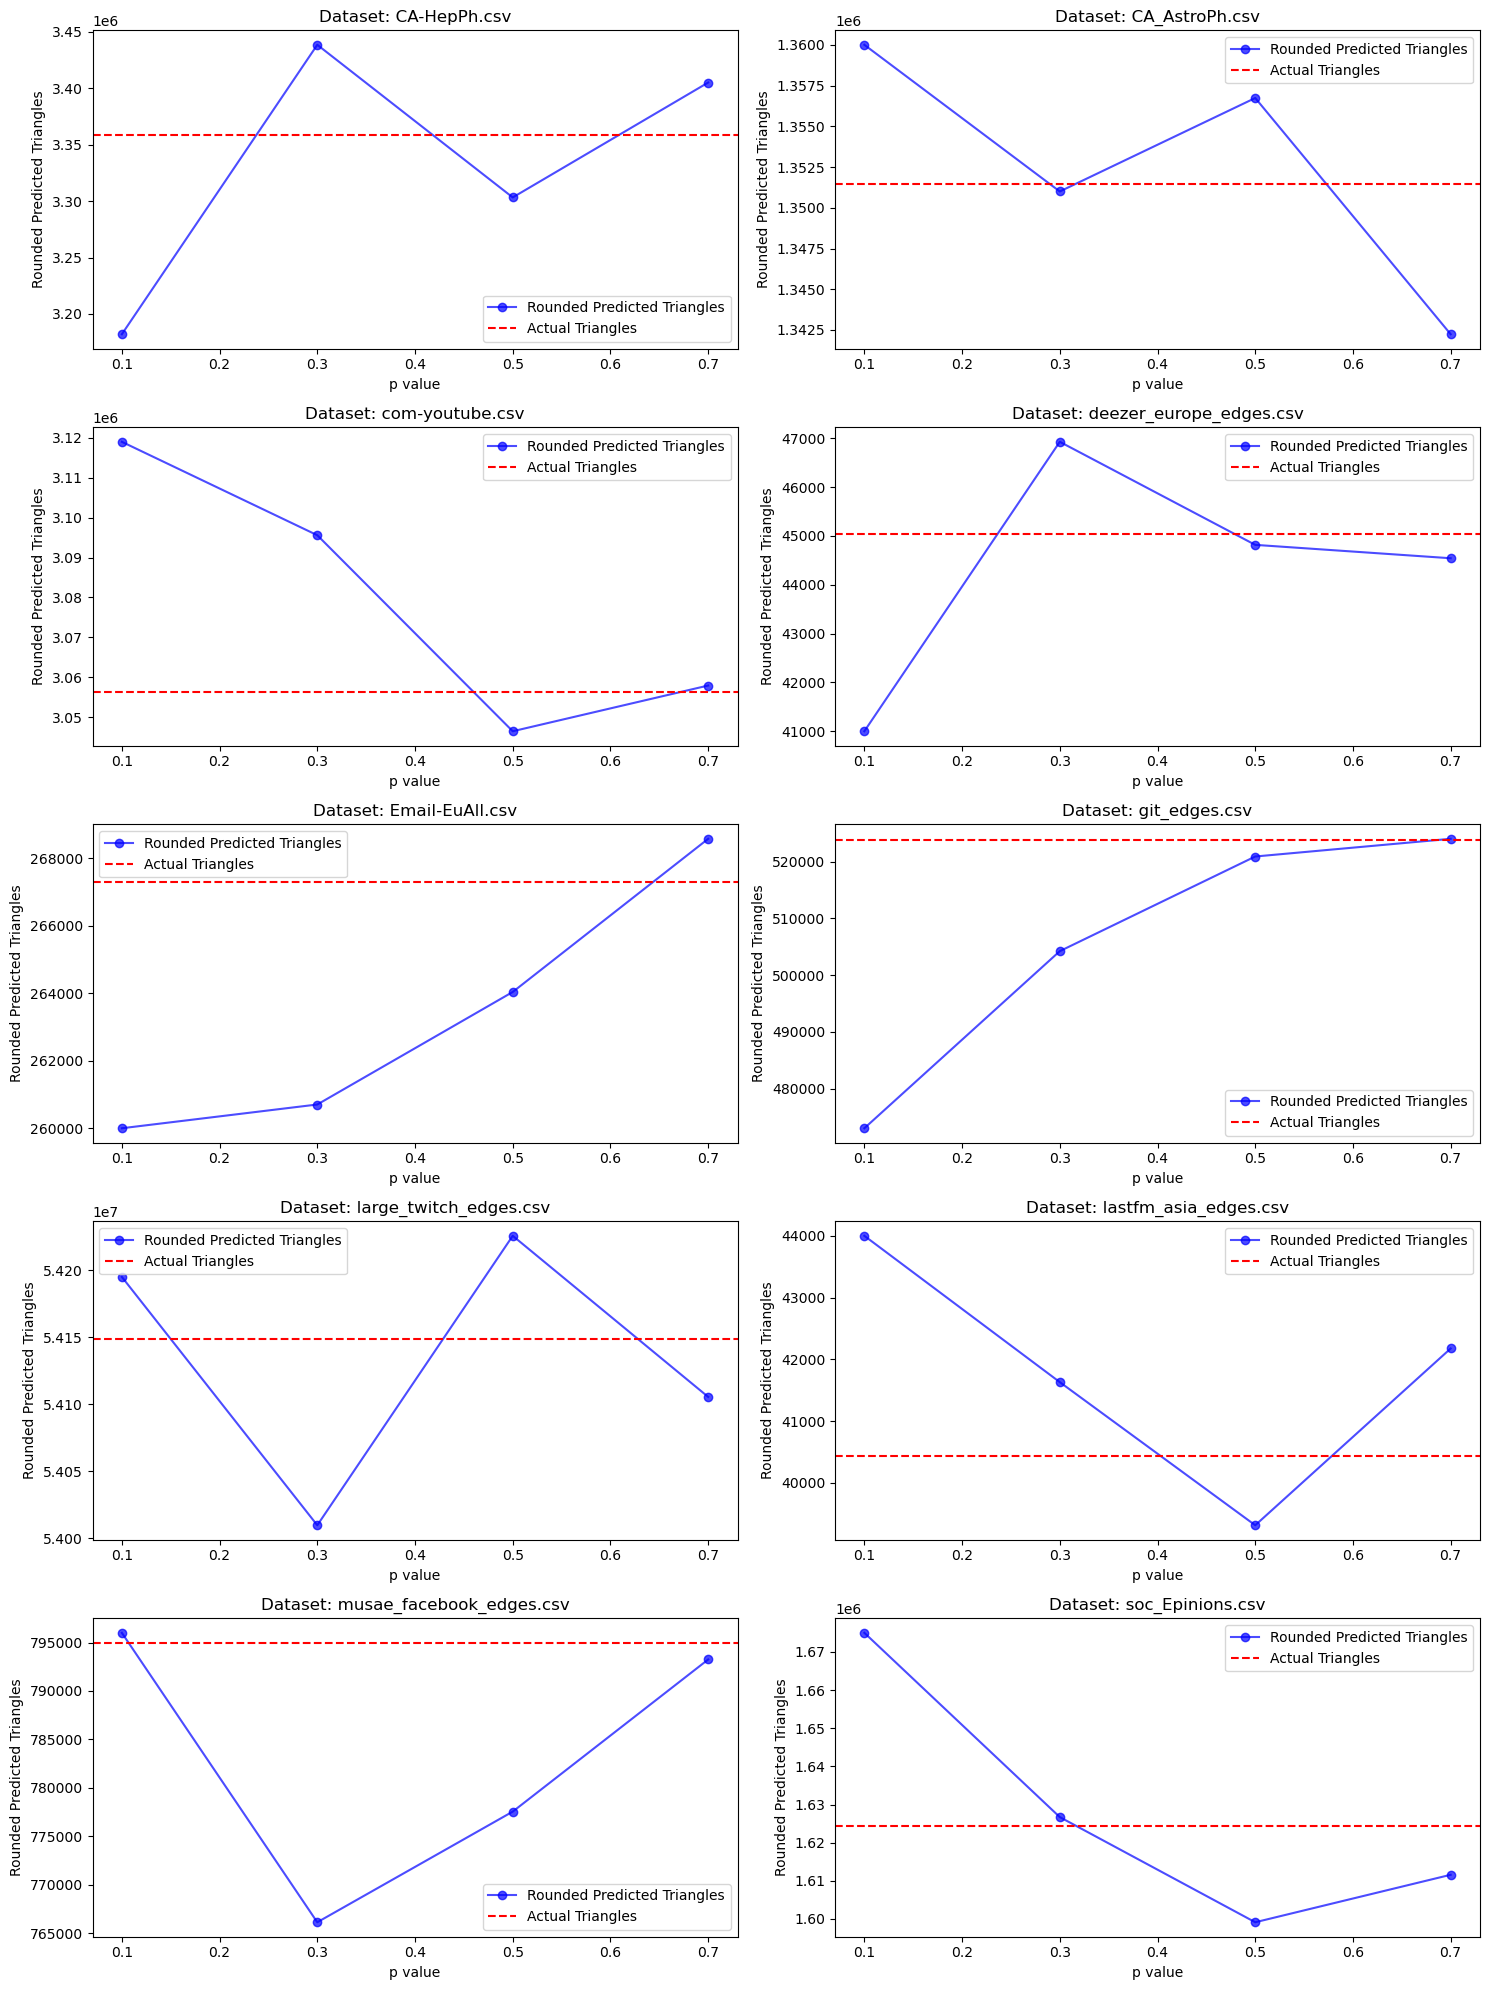

In [213]:
# List of datasets to plot (assumed that there are 10 datasets)
datasets = merged_df['dataset'].unique()

# Create subplots with 5 rows and 2 columns (adjusting for 10 datasets)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot for each dataset
for idx, dataset in enumerate(datasets):
    # Filter data for the current dataset
    data = merged_df[merged_df['dataset'] == dataset]
    
    # Get unique p values (sorted)
    unique_p_values = sorted(data['p'].unique())
    
    # Filter the rounded_values for these unique p values
    unique_values = data[data['p'].isin(unique_p_values)]
    
    # Plot the line plot for rounded values at unique p values
    axes[idx].plot(unique_values['p'], unique_values['rounded_values'], label='Rounded Predicted Triangles', marker='o', linestyle='-', color='blue', alpha=0.7)
    
    # Get the first value of the triangles column (the actual triangles for this dataset)
    actual_triangles = data['triangles'].iloc[0]
    
    # Add a horizontal dashed line at the value of the first 'triangles' value
    axes[idx].axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Triangles')

    # Set labels and title
    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Rounded Predicted Triangles")
    
    # Add legend
    axes[idx].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Plots for presentation

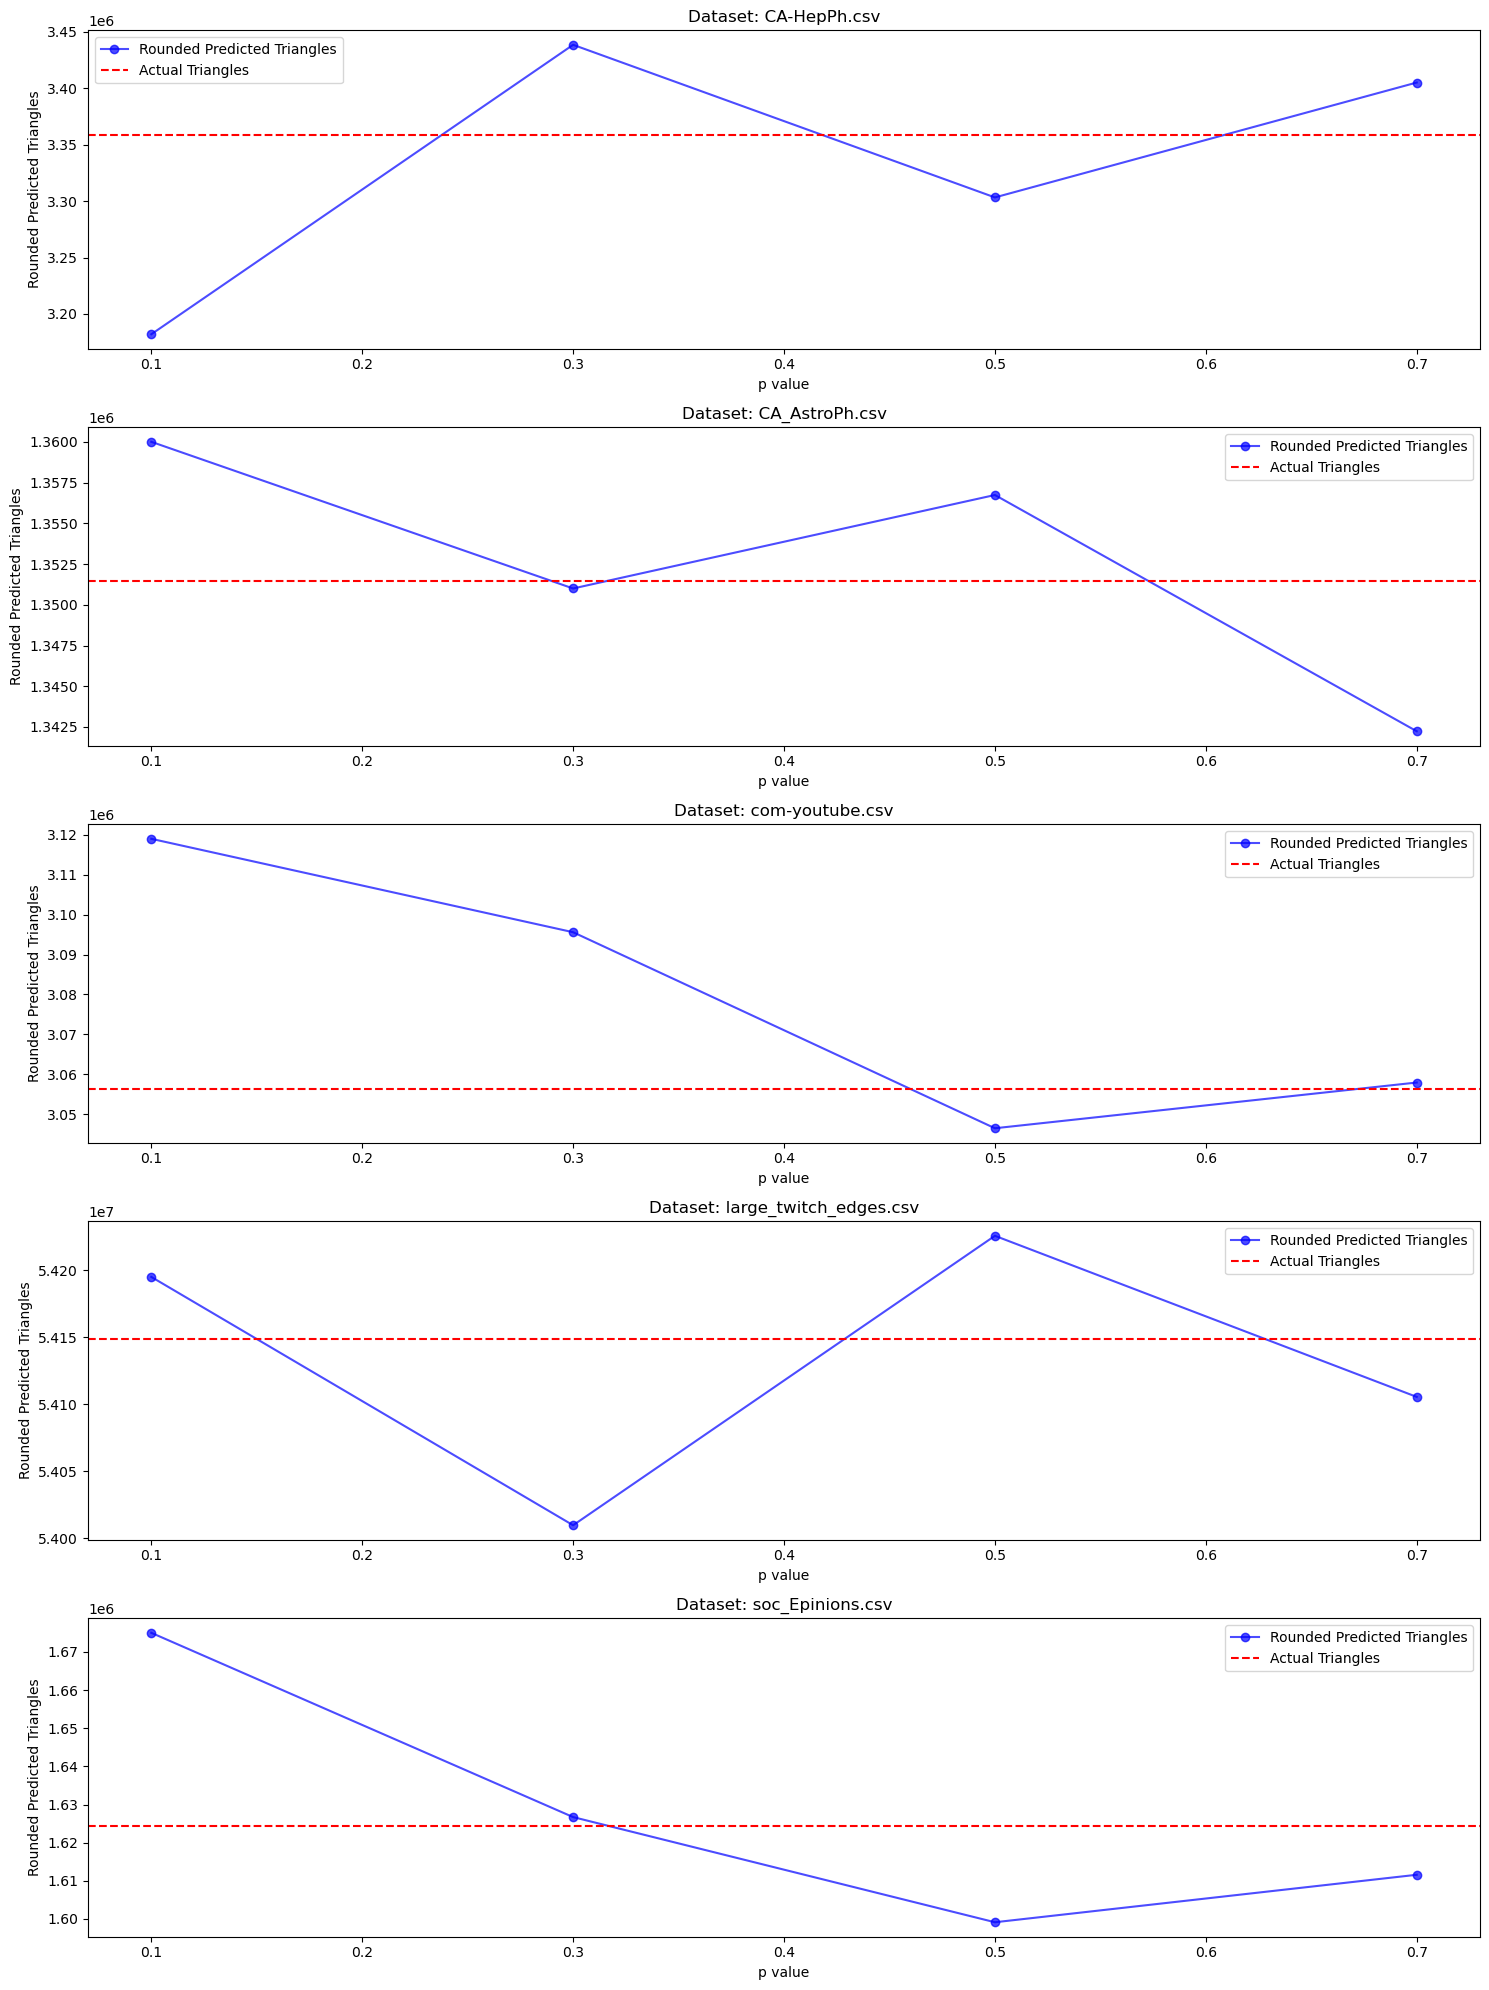

In [214]:
# keep only the five datasets with the most triangles
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = merged_df['dataset'].isin(most_triangles_datasets)
presentation_df = merged_df[mask]

datasets = presentation_df["dataset"].unique()
p_values = presentation_df["p"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))


axes = axes.flatten()


for idx, dataset in enumerate(datasets):
   
    data = presentation_df[presentation_df['dataset'] == dataset]
    
    unique_p_values = sorted(data['p'].unique())

    unique_values = data[data['p'].isin(unique_p_values)]
    
    axes[idx].plot(unique_values['p'], unique_values['rounded_values'], label='Rounded Predicted Triangles', marker='o', linestyle='-', color='blue', alpha=0.7)
    
    actual_triangles = data['triangles'].iloc[0]
    
    axes[idx].axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Triangles')

    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Rounded Predicted Triangles")
    
    axes[idx].legend()

plt.tight_layout()

plt.show()

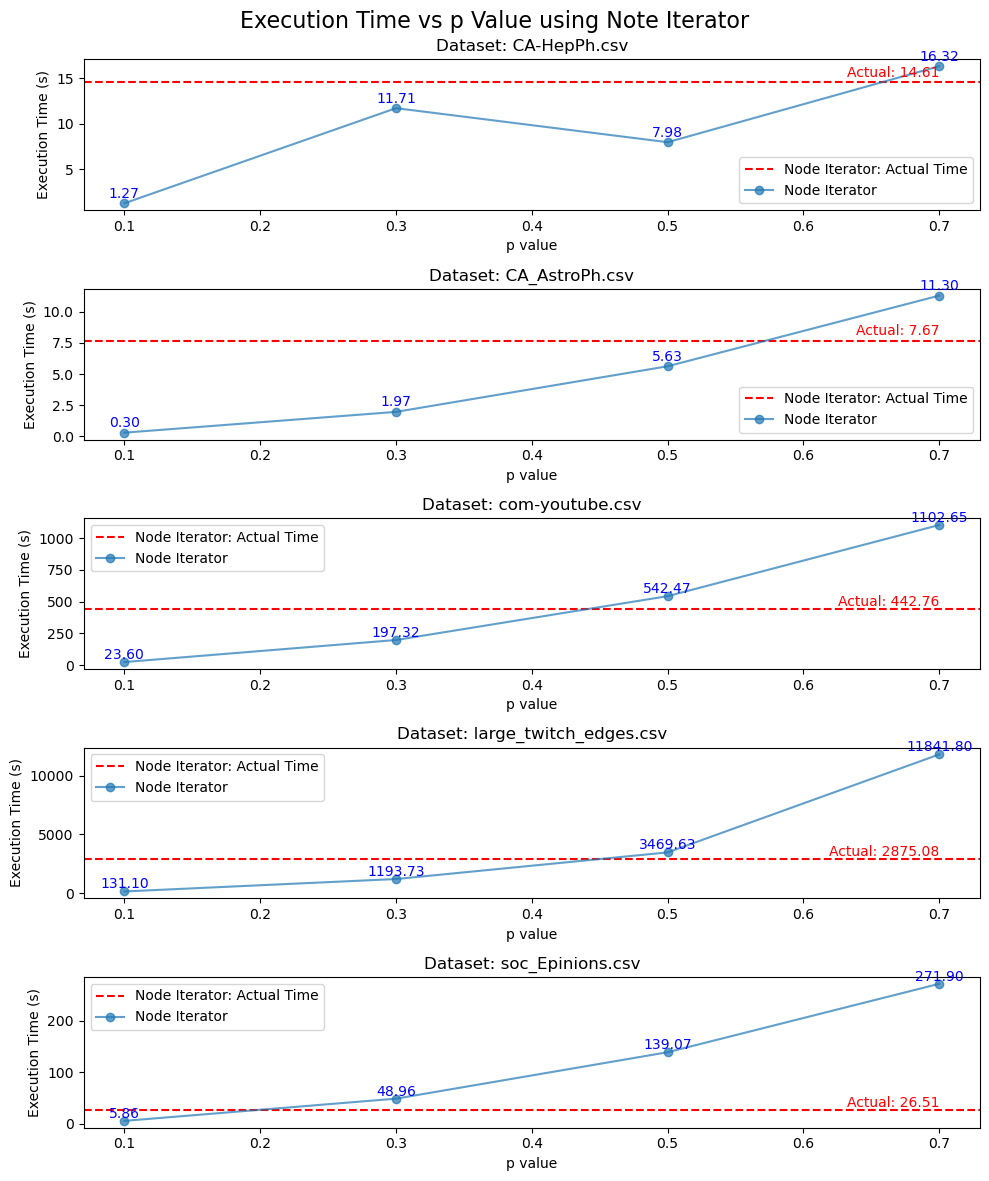

In [215]:
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = doulion_results['dataset'].isin(most_triangles_datasets)
presentation_df = doulion_results[mask]

datasets = presentation_df["dataset"].unique()
p_values = presentation_df["p"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
fig.suptitle('Execution Time vs p Value using Note Iterator', fontsize=16)

axes = axes.flatten()

for idx, dataset in enumerate(datasets):
    data = presentation_df[presentation_df['dataset'] == dataset]
    
    algorithm = 'Node Iterator'
    algorithm_data = data[data['algorithm'] == algorithm]
    
    actual_execution_time = result[(result['algorithm'] == algorithm) & (result['dataset'] == dataset)]['execution_time'].iloc[0]

    axes[idx].axhline(y=actual_execution_time, color='red', linestyle='--', label=f'{algorithm}: Actual Time')
    
    axes[idx].plot(algorithm_data['p'], algorithm_data['execution_time'], label=f'{algorithm}', marker='o', linestyle='-', alpha=0.7)

    for i, p_value in enumerate(algorithm_data['p']):
        execution_time = algorithm_data.iloc[i]['execution_time']
        axes[idx].text(p_value, execution_time + 0.2, f'{execution_time:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    max_p_value = max(algorithm_data['p'])
    axes[idx].text(max_p_value, actual_execution_time + 0.2, f'Actual: {actual_execution_time:.2f}', color='red', fontsize=10, ha='right', va='bottom')

    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Execution Time (s)")
    
    axes[idx].legend()

plt.tight_layout()

plt.show()

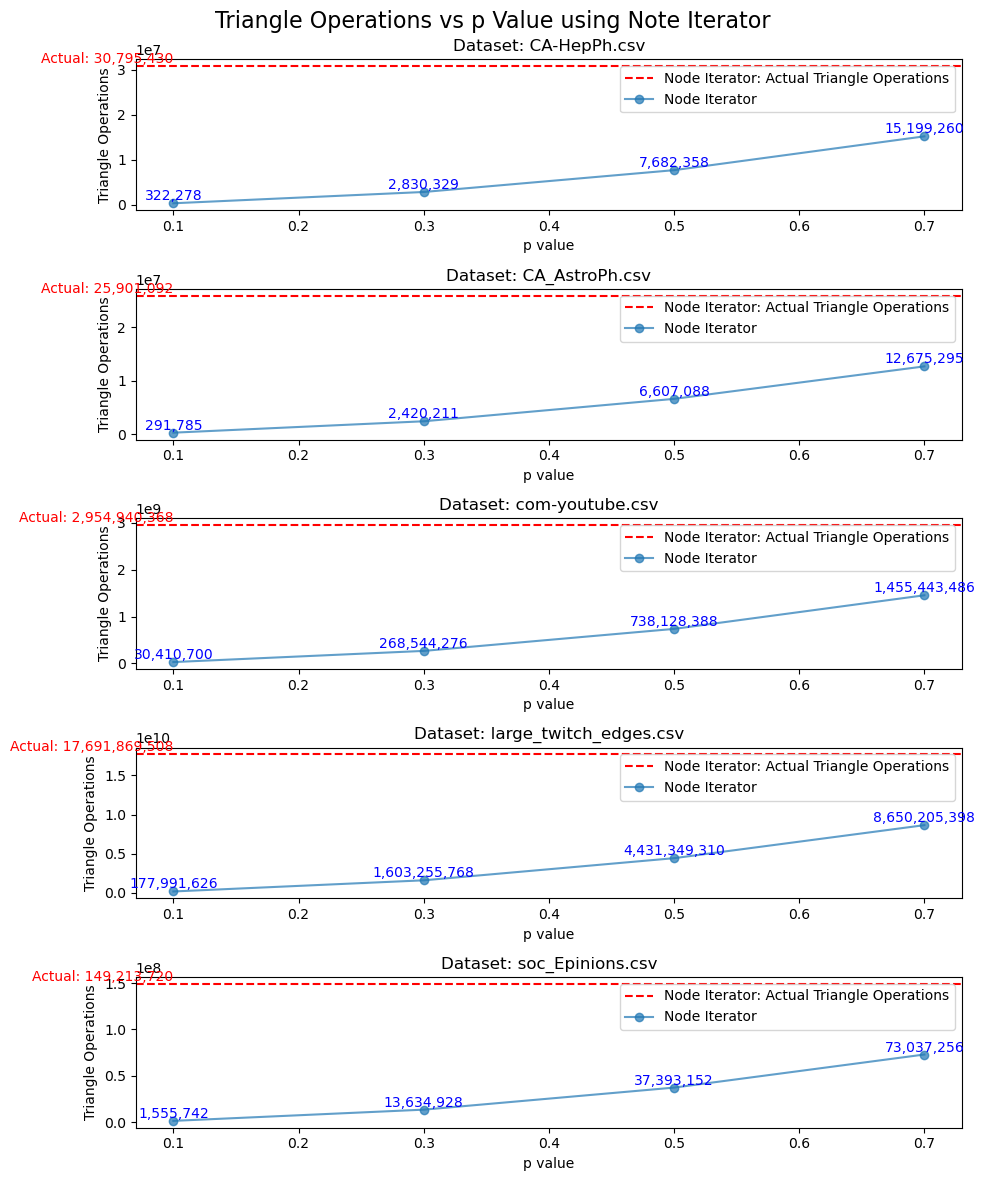

In [216]:
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = doulion_results['dataset'].isin(most_triangles_datasets)
presentation_df = doulion_results[mask]

datasets = presentation_df["dataset"].unique()
p_values = presentation_df["p"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
fig.suptitle('Triangle Operations vs p Value using Note Iterator', fontsize=16)

axes = axes.flatten()

for idx, dataset in enumerate(datasets):
    data = presentation_df[presentation_df['dataset'] == dataset]
    
    algorithm = 'Node Iterator'
    algorithm_data = data[data['algorithm'] == algorithm]
    
    actual_triangle_operations = result[(result['algorithm'] == algorithm) & (result['dataset'] == dataset)]['triangle_operations'].iloc[0]

    axes[idx].axhline(y=actual_triangle_operations, color='red', linestyle='--', label=f'{algorithm}: Actual Triangle Operations')
    
    axes[idx].plot(algorithm_data['p'], algorithm_data['triangle_operations'], label=f'{algorithm}', marker='o', linestyle='-', alpha=0.7)

    for i, p_value in enumerate(algorithm_data['p']):
        triangle_operations = algorithm_data.iloc[i]['triangle_operations']
        axes[idx].text(p_value, triangle_operations + 0.2, f'{triangle_operations:,.0f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    max_p_value = min(algorithm_data['p'])
    axes[idx].text(max_p_value, actual_triangle_operations + 0.2, f'Actual: {actual_triangle_operations:,.0f}', color='red', fontsize=10, ha='right', va='bottom')

    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Triangle Operations")
    
    axes[idx].legend()

plt.tight_layout()

plt.show()

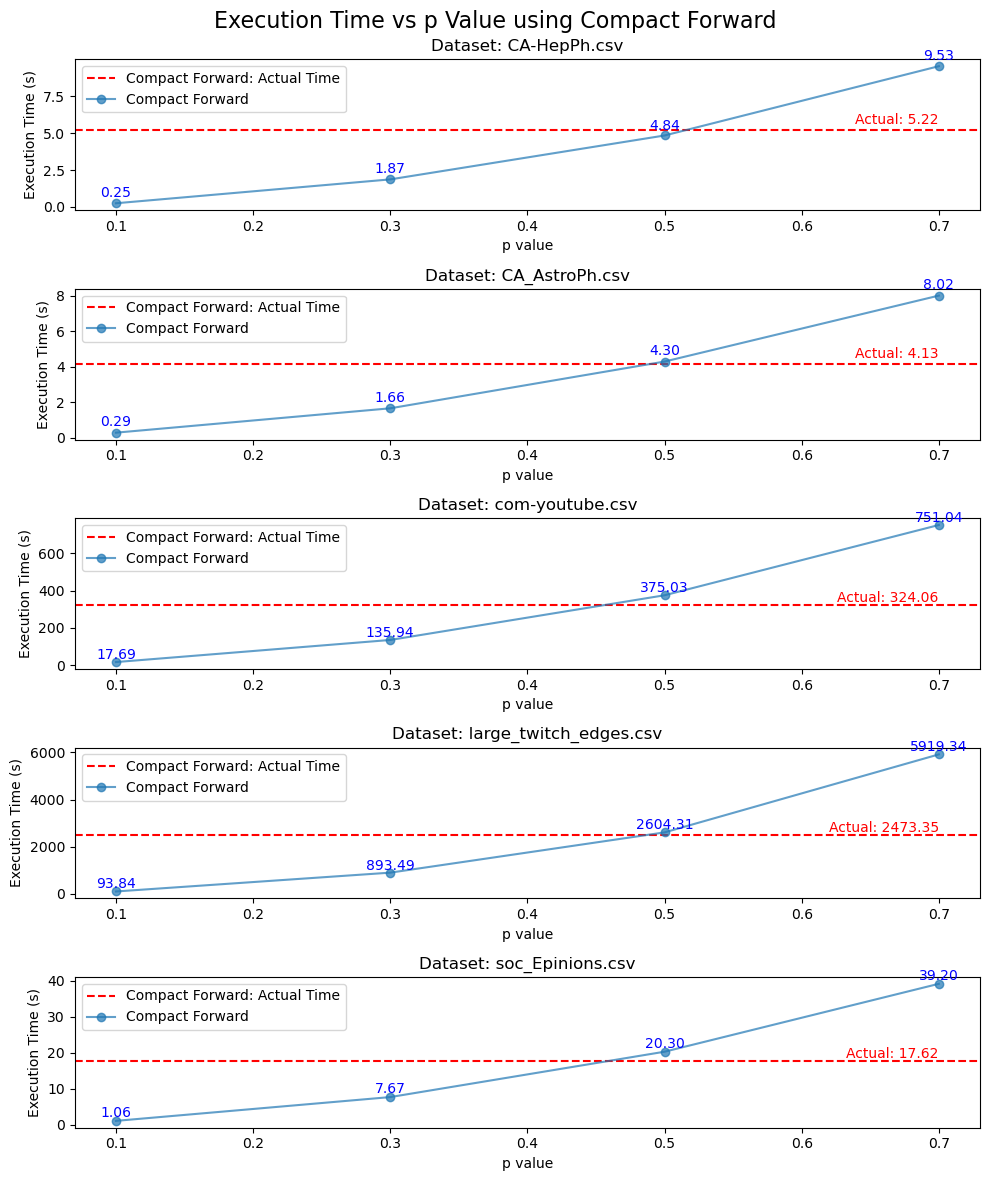

In [217]:
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = doulion_results['dataset'].isin(most_triangles_datasets)
presentation_df = doulion_results[mask]

datasets = presentation_df["dataset"].unique()
p_values = presentation_df["p"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
fig.suptitle('Execution Time vs p Value using Compact Forward', fontsize=16)

axes = axes.flatten()

for idx, dataset in enumerate(datasets):
    data = presentation_df[presentation_df['dataset'] == dataset]
    
    algorithm = 'Compact Forward'
    algorithm_data = data[data['algorithm'] == algorithm]
    
    actual_execution_time = result[(result['algorithm'] == algorithm) & (result['dataset'] == dataset)]['execution_time'].iloc[0]

    axes[idx].axhline(y=actual_execution_time, color='red', linestyle='--', label=f'{algorithm}: Actual Time')
    
    axes[idx].plot(algorithm_data['p'], algorithm_data['execution_time'], label=f'{algorithm}', marker='o', linestyle='-', alpha=0.7)

    for i, p_value in enumerate(algorithm_data['p']):
        execution_time = algorithm_data.iloc[i]['execution_time']
        axes[idx].text(p_value, execution_time + 0.2, f'{execution_time:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    max_p_value = max(algorithm_data['p'])
    axes[idx].text(max_p_value, actual_execution_time + 0.2, f'Actual: {actual_execution_time:.2f}', color='red', fontsize=10, ha='right', va='bottom')

    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Execution Time (s)")
    
    axes[idx].legend()

plt.tight_layout()

plt.show()

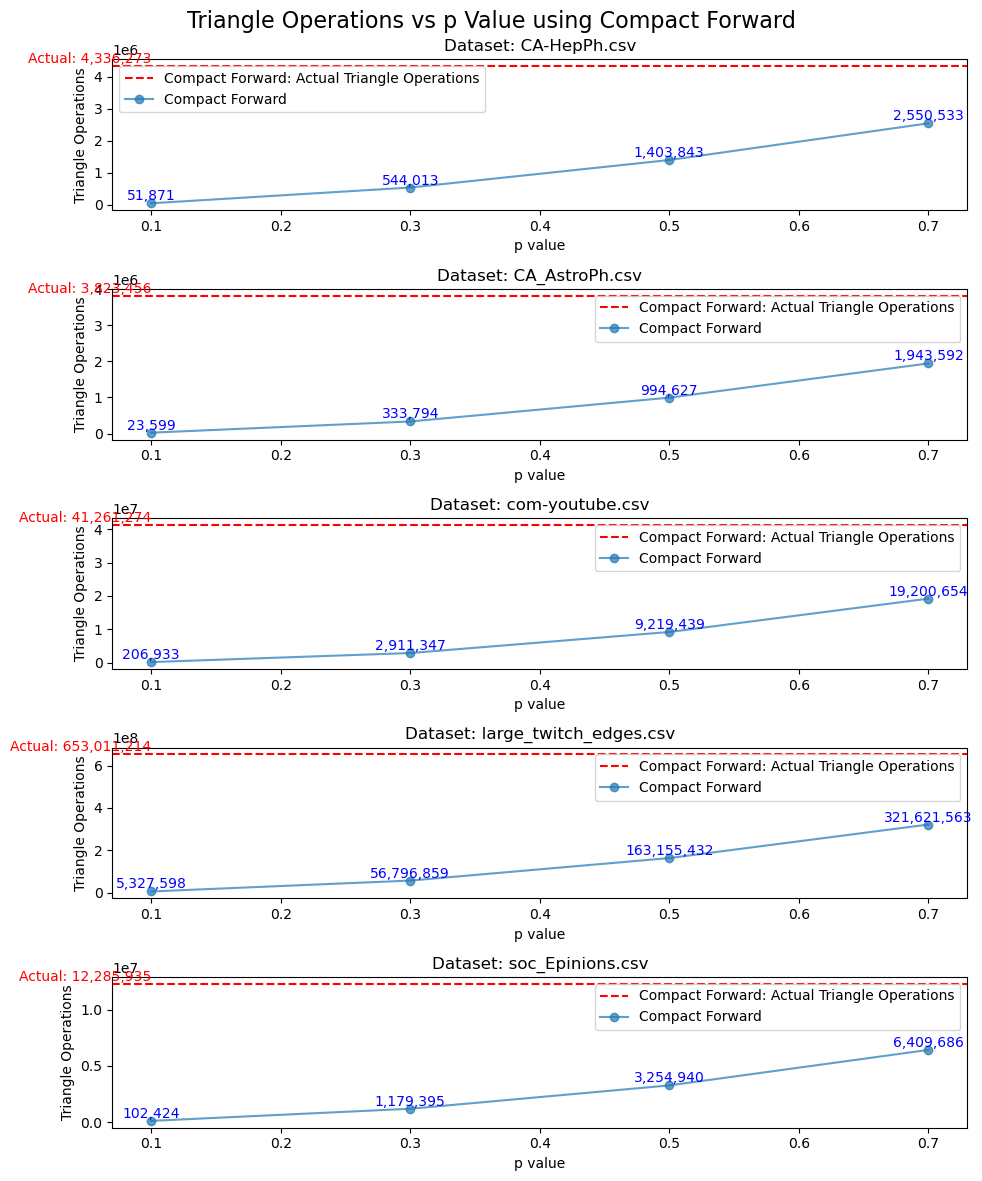

In [218]:
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']

mask = doulion_results['dataset'].isin(most_triangles_datasets)
presentation_df = doulion_results[mask]

datasets = presentation_df["dataset"].unique()
p_values = presentation_df["p"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
fig.suptitle('Triangle Operations vs p Value using Compact Forward', fontsize=16)

axes = axes.flatten()

for idx, dataset in enumerate(datasets):
    data = presentation_df[presentation_df['dataset'] == dataset]
    
    algorithm = 'Compact Forward'
    algorithm_data = data[data['algorithm'] == algorithm]
    
    actual_triangle_operations = result[(result['algorithm'] == algorithm) & (result['dataset'] == dataset)]['triangle_operations'].iloc[0]

    axes[idx].axhline(y=actual_triangle_operations, color='red', linestyle='--', label=f'{algorithm}: Actual Triangle Operations')
    
    axes[idx].plot(algorithm_data['p'], algorithm_data['triangle_operations'], label=f'{algorithm}', marker='o', linestyle='-', alpha=0.7)

    for i, p_value in enumerate(algorithm_data['p']):
        triangle_operations = algorithm_data.iloc[i]['triangle_operations']
        axes[idx].text(p_value, triangle_operations + 0.2, f'{triangle_operations:,.0f}', ha='center', va='bottom', fontsize=10, color='blue')
    
    max_p_value = min(algorithm_data['p'])
    axes[idx].text(max_p_value, actual_triangle_operations + 0.2, f'Actual: {actual_triangle_operations:,.0f}', color='red', fontsize=10, ha='right', va='bottom')

    axes[idx].set_title(f"Dataset: {dataset}")
    axes[idx].set_xlabel("p value")
    axes[idx].set_ylabel("Triangle Operations")
    
    axes[idx].legend()

plt.tight_layout()

plt.show()

# Triest

In [219]:
triest_results = pd.read_csv('output/triest_results.csv', delimiter=',')

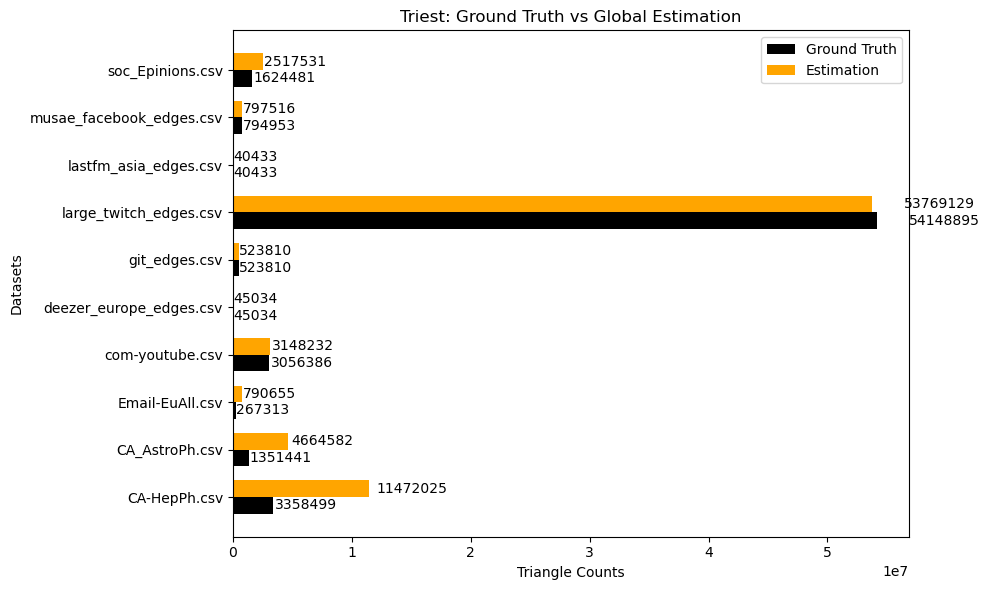

In [220]:
datasets = triest_results['dataset']
ground_truth = [3358499, 1351441, 267313, 3056386, 45034, 523810, 54148895, 40433, 794953, 1624481]
estimations = triest_results['Global Triangle Estimation']


x = np.arange(len(datasets))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
g_bars =ax.barh(x - width/2, ground_truth, width, label='Ground Truth', color='black')
e_bars = ax.barh(x + width/2, estimations, width, label='Estimation', color='orange')

ax.set_ylabel('Datasets')
ax.set_xlabel('Triangle Counts')
ax.set_title('Triest: Ground Truth vs Global Estimation')
ax.set_yticks(x)
ax.set_yticklabels(datasets, rotation=0)
ax.legend()
for bar in g_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width}',
             ha='left',
             va='center')

for bar in e_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width}',
             ha='left',
             va='center')


plt.tight_layout()
plt.show()


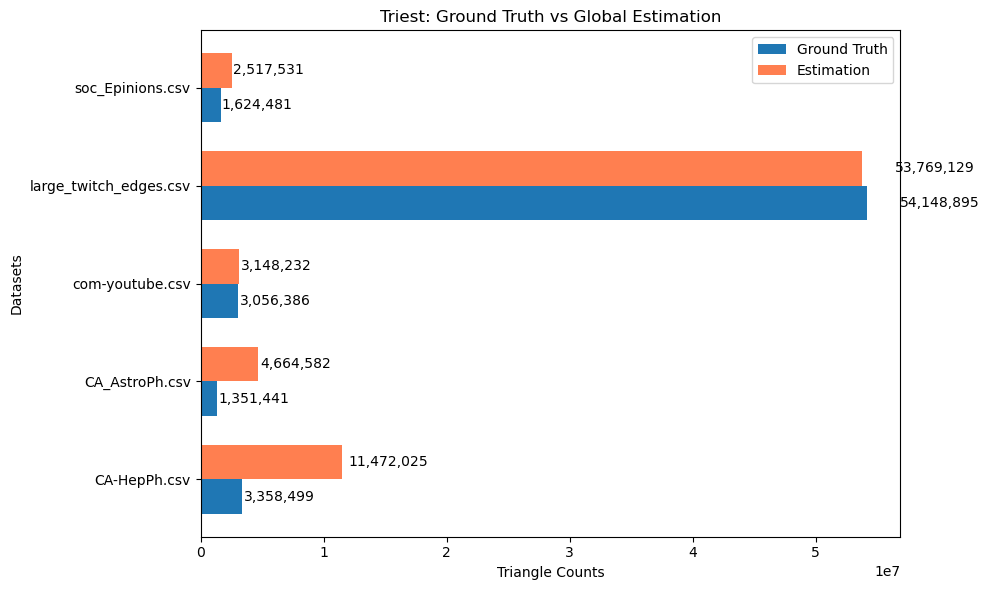

In [221]:
most_triangles_datasets = ['CA-HepPh.csv', 'CA_AstroPh.csv', 'com-youtube.csv', 'soc_Epinions.csv', 'large_twitch_edges.csv']
datasets_info = pd.read_csv('output/datasets_stats.csv', delimiter=',')
mask = triest_results['dataset'].isin(most_triangles_datasets)
presentation_df = triest_results[mask]

merged_df = pd.merge(presentation_df, datasets_info, on='dataset')

datasets = merged_df['dataset']

estimations = merged_df['Global Triangle Estimation']
ground_truth = merged_df['triangles']

x = np.arange(len(datasets))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
g_bars =ax.barh(x - width/2, ground_truth, width, label='Ground Truth')
e_bars = ax.barh(x + width/2, estimations, width, label='Estimation', color='coral')

ax.set_ylabel('Datasets')
ax.set_xlabel('Triangle Counts')
ax.set_title('Triest: Ground Truth vs Global Estimation')
ax.set_yticks(x)
ax.set_yticklabels(datasets, rotation=0)
ax.legend()
for bar in g_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}',
             ha='left',
             va='center')

for bar in e_bars:
    width = bar.get_width()
    offset = width * 0.05
    plt.text(width + offset,
             bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}',
             ha='left',
             va='center')


plt.tight_layout()
plt.show()